실습 과제2: 벡터화 연산과 브로드캐스팅 이해하기
문제 1: 기본 벡터화와 브로드캐스팅 이해하기
x = np.linspace(0, 5, 50)와 y = np.linspace(0, 5, 50)[:, np.newaxis]를 생성하세요. 여기서 x는 (50,)의 1차원 배열이고, y는 [:, np.newaxis]를 사용하여 (50, 1)의 2차원 배열로 변환됩니다.

x와 y의 형태를 출력하여 브로드캐스팅이 어떻게 이루어지는지 확인하세요.

문제 2: 브로드캐스팅을 활용하여 수식 계산하기
z = np.sin(x) ** 200 + np.cos(300 + y * x) * np.cos(x)를 사용하여 z 배열을 계산하세요.

z 배열의 형태를 출력하고, 브로드캐스팅에 의해 z의 형태가 (50, 50)이 되었는지 확인하세요.

문제 3: 벡터화 연산으로 계산 속도 비교하기
for 반복문을 사용해 z의 각 요소를 수동으로 계산하는 코드를 작성하고, 벡터화 연산으로 구한 z와 같은 결과가 나오는지 확인하세요.

timeit 모듈을 사용하여 반복문을 통한 계산과 벡터화 연산을 각각 수행하는 데 걸리는 시간을 측정하고, 두 연산 방식의 속도 차이를 비교하세요.


문제 4: 그래프를 사용해 시각적으로 결과 확인하기
z 값을 시각적으로 이해하기 위해 matplotlib 라이브러리를 사용하여 z의 값을 컬러 맵으로 시각화하세요.

plt.imshow(z, extent=(0, 5, 0, 5), origin='lower', cmap='viridis')와 plt.colorbar()를 사용해 결과를 시각화하고, 그래프의 형태를 확인하세요.



문제 1: 기본 벡터화와 브로드캐스팅 이해하기

In [1]:
import numpy as np
x = np.linspace(0,5,50)
y = np.linspace(0,5,50)[:,np.newaxis]
print("x: " ,x.shape, " y : " ,y.shape)

x:  (50,)  y :  (50, 1)


문제 2: 브로드캐스팅을 활용하여 수식 계산하기

In [2]:
z = np.sin(x)**200 + np.cos(300+y*x)*np.cos(x)
print("z : ", z)
print(" z.shape : ",z.shape)

z :  [[-0.02209662 -0.02198168 -0.02163806 ...  0.49547289  0.02724053
  -0.00604054]
 [-0.02209662 -0.01162504 -0.00124733 ...  0.53489941  0.11614127
   0.13325184]
 [-0.02209662 -0.00126714  0.01914395 ...  0.56550331  0.18429112
   0.23866154]
 ...
 [-0.02209662  0.44811731  0.80031128 ...  0.42767562 -0.15237784
  -0.26153187]
 [-0.02209662  0.45734059  0.81188813 ...  0.41425119 -0.13819336
  -0.17481867]
 [-0.02209662  0.46651428  0.8231129  ...  0.42032637 -0.08254055
  -0.04351942]]
 z.shape :  (50, 50)


문제 3: 벡터화 연산으로 계산 속도 비교하기

In [3]:
%timeit z = np.sin(x)**200 + np.cos(300+y*x)*np.cos(x)

33.6 µs ± 838 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [4]:
def multi_xy(a,b):
  result = np.empty((len(a),len(b)))
  for i in range(len(b)):
    for j in range(len(a)):
      result[i][j] = np.sin(a[j])**200 + np.cos(300+b[i][0]*a[j])*np.cos(a[j])
  return result
%timeit z1 = multi_xy(x,y)


6.53 ms ± 33 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


문제 4: 그래프를 사용해 시각적으로 결과 확인하기

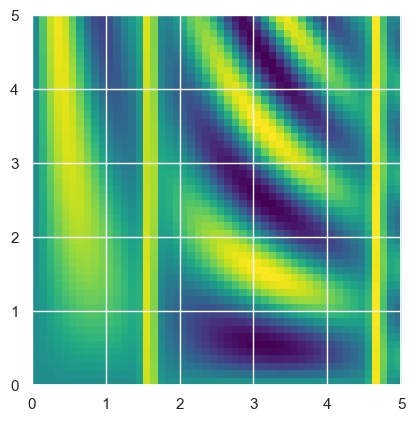

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
# plt.style.use('seaborn-whitegrid')
plt.imshow(z, extent=(0, 5, 0, 5), origin='lower', cmap='viridis')